## Fronteira Eficiente de Markowitz

In [1]:
# vamos importar os módulos necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from datetime import datetime

### Vamos usar os dados do Yahoo Finance ou do Google Finance

In [2]:
# download dos dados pelo Yahoo Finance!

start = datetime(2019, 1, 1)
# end = datetime(2018, 12, 31)
acoes = ['PETR4.SA', 'VALE3.SA', 'MGLU3.SA', 'BIDI4.SA', 'ALPA4.SA']
dados = web.get_data_yahoo(acoes, start)['Adj Close']

In [3]:
# checando os dados
dados.describe()

Symbols,PETR4.SA,VALE3.SA,MGLU3.SA,BIDI4.SA,ALPA4.SA
count,815.000000,815.000000,815.000000,756.000000,815.000000
mean,20.077380,58.538647,13.910151,9.401895,32.241539
std,4.251694,22.948605,7.014924,7.115666,11.251012
min,8.394792,26.793816,4.858775,1.950524,13.713892
25%,17.605227,38.468142,6.855000,4.001649,23.960800
50%,19.886688,48.008858,12.440000,6.301413,31.697575
75%,21.953356,80.111153,20.603040,14.577420,39.584204
max,31.719225,102.327774,27.401571,28.487476,60.545784


In [4]:
dados.tail()

Symbols,PETR4.SA,VALE3.SA,MGLU3.SA,BIDI4.SA,ALPA4.SA
Date,,,,,
2022-04-08,31.298376,95.150002,6.13,6.34,24.160000
2022-04-11,31.060505,94.000000,6.08,6.18,23.580000
2022-04-12,30.969015,93.370003,5.97,5.68,22.750000
2022-04-13,31.627737,93.400002,6.03,5.75,22.860001
2022-04-14,31.270000,92.089996,6.01,5.64,22.690001


### Calculando os retornos

In [5]:
# calculo dos retornos diários e anuais
retorno_diario = dados.pct_change()
retorno_anual = retorno_diario.mean() * 250

In [6]:
retorno_diario.tail()

Symbols,PETR4.SA,VALE3.SA,MGLU3.SA,BIDI4.SA,ALPA4.SA
Date,,,,,
2022-04-08,0.004994,-0.020385,-0.065549,-0.029096,-0.021070
2022-04-11,-0.007600,-0.012086,-0.008157,-0.025237,-0.024007
2022-04-12,-0.002946,-0.006702,-0.018092,-0.080906,-0.035199
2022-04-13,0.021270,0.000321,0.010050,0.012324,0.004835
2022-04-14,-0.011311,-0.014026,-0.003317,-0.019130,-0.007437


### Calculando a covariância

In [7]:
# cálculo da covariância diária e anual
cov_diaria = retorno_diario.cov()
cov_anual = cov_diaria * 250

### Criando listas para armanezar as principais variáveis

In [8]:
# vamos criar 4 listas para armazenar os valores do retorno da carteira, o peso de cada ação, a volatilidade e o sharpe ratio
# empty lists to store returns, volatility and weights of imiginary portfolios
retorno_carteira = []
peso_acoes = []
volatilidade_carteira = []
sharpe_ratio = []

### Simulando o número de portfólios

In [9]:
# vamos usar uma simulação aleatória
numero_acoes = len(acoes)
numero_carteiras = 100_000

np.random.seed(101)

In [10]:
# vamos fazer um for loop para preencher as lista que criamos anteriormente
for cada_carteira in range(numero_carteiras):
    # vamos dar um peso aleatório para cada ação dentro de cada carteira
    peso = np.random.random(numero_acoes)
    peso /= np.sum(peso)
    # vamos calcular o retorno das carteiras
    retorno = np.dot(peso, retorno_anual)
    # vamos calcular a volatilidade das carteiras
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov_anual, peso)))
    # vamos calcular o índice de Sharpe de cada carteira
    sharpe = retorno / volatilidade
    # aqui nós usamos o método apend para incluir cada carteira nas listas criadas anteriormente
    sharpe_ratio.append(sharpe)
    retorno_carteira.append(retorno)
    volatilidade_carteira.append(volatilidade)
    peso_acoes.append(peso)

### Criando dicionário com os dados

In [11]:
carteira = {'Retorno': retorno_carteira,
             'Volatilidade': volatilidade_carteira,
             'Sharpe Ratio': sharpe_ratio}

for contar,acao in enumerate(acoes):
    carteira[acao+' Peso'] = [Peso[contar] for Peso in peso_acoes]

# vamos transformar nosso dicionário em um dataframe
df = pd.DataFrame(carteira)

# vamos nomear as colunas do novo dataframe
colunas = ['Retorno', 'Volatilidade', 'Sharpe Ratio'] + [acao+' Peso' for acao in acoes]
df = df[colunas]

### Criando o gráfico da fronteira eficiente

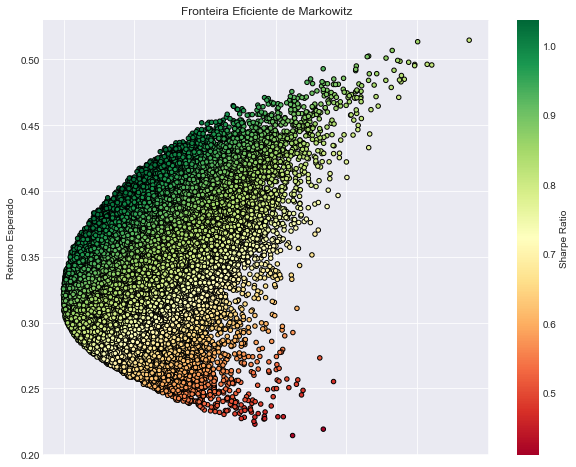

In [12]:
# plot frontier, max sharpe & min Volatility values with a scatterplot
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Identificando o melhor Sharpe Ratio e a carteira de mínima variância

In [13]:
# vamos identificar as variáveis de interesse
menor_volatilidade = df['Volatilidade'].min()
maior_sharpe = df['Sharpe Ratio'].max()

# vamos identificar os dois principais portfolios
carteira_sharpe = df.loc[df['Sharpe Ratio'] == maior_sharpe]
carteira_min_variancia = df.loc[df['Volatilidade'] == menor_volatilidade]

### Criando novo gráfico da fronteira eficiente

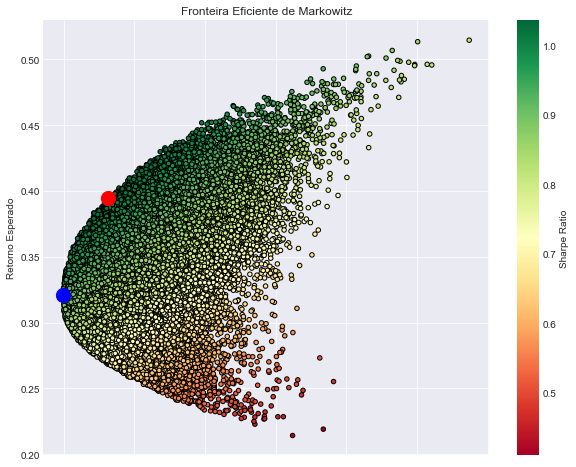

In [14]:
plt.style.use('seaborn-dark')
df.plot.scatter(x='Volatilidade', y='Retorno', c='Sharpe Ratio',
                cmap='RdYlGn', edgecolors='black', figsize=(10, 8), grid=True)
plt.scatter(x=carteira_sharpe['Volatilidade'], y=carteira_sharpe['Retorno'], c='red', marker='o', s=200)
plt.scatter(x=carteira_min_variancia['Volatilidade'], y=carteira_min_variancia['Retorno'], c='blue', marker='o', s=200 )
plt.xlabel('Volatilidade')
plt.ylabel('Retorno Esperado')
plt.title('Fronteira Eficiente de Markowitz')
plt.show()

### Analisando as duas principais carteiras

In [15]:
print("Essa é a carteira de Mínima Variância:", '\n', carteira_min_variancia.T)
print('\n')
print("Essa é a carteira com maior Sharpe Ratio:", '\n', carteira_sharpe.T)

Essa é a carteira de Mínima Variância: 
                   81750
Retorno        0.321064
Volatilidade   0.349844
Sharpe Ratio   0.917734
PETR4.SA Peso  0.111267
VALE3.SA Peso  0.439578
MGLU3.SA Peso  0.058936
BIDI4.SA Peso  0.045527
ALPA4.SA Peso  0.344691


Essa é a carteira com maior Sharpe Ratio: 
                   93749
Retorno        0.394909
Volatilidade   0.381220
Sharpe Ratio   1.035911
PETR4.SA Peso  0.025779
VALE3.SA Peso  0.542028
MGLU3.SA Peso  0.008104
BIDI4.SA Peso  0.256424
ALPA4.SA Peso  0.167665
